In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('datasets/cleaned/clean_136k.csv')

In [10]:
X = df.drop(['label'], axis=1)
y = df['label']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

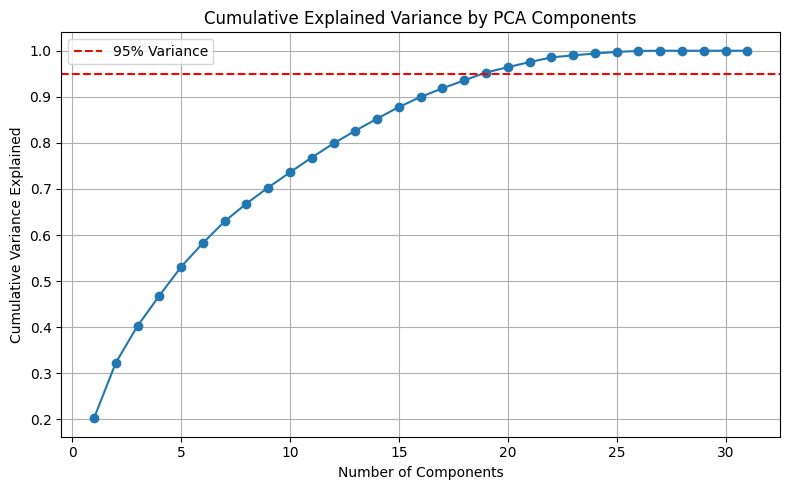

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_n = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components to reach 95% variance:", optimal_n)


Number of components to reach 95% variance: 19


In [15]:
pca_opt = PCA(n_components=optimal_n)
X_reduced = pca_opt.fit_transform(X_scaled)

df_reduced = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(optimal_n)])
df_reduced["label"] = y.values

df_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,label
0,-0.522601,-0.202818,-0.028275,-0.338111,-1.228208,-2.151698,-0.185176,-0.673003,2.019876,0.383843,0.020363,-0.967534,1.426672,-0.058026,1.394072,0.717197,-0.179356,0.288633,0.041706,1
1,-0.436853,-0.130618,-0.116659,-0.135106,-0.365010,-0.139651,0.139271,-0.059118,-0.787792,-0.139680,-0.002896,0.248282,0.078264,-0.046123,0.189309,0.012066,-0.044501,-0.086067,0.091801,0
2,-0.400620,0.125110,0.009528,-0.365661,-1.390868,-2.603132,-0.287038,-0.551802,2.084783,0.372612,0.047909,-1.154817,1.432810,-0.103782,1.234837,0.512051,-0.002193,0.175927,-0.126322,1
3,-0.522119,-0.373127,-0.070872,-0.025886,-0.215515,-0.060572,0.130280,-0.294605,0.339905,0.049388,-0.043790,0.373779,-0.473900,0.005068,-0.556198,-0.267553,0.000755,-0.199975,0.324252,0
4,-0.651363,-0.762120,-0.173721,0.264111,0.407726,1.633952,0.477984,-0.429817,1.538762,0.293540,-0.048018,-0.008643,-0.562724,0.161444,-0.608073,-0.036502,-0.020450,0.168245,-0.245383,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135995,-0.398332,-0.115623,-0.264480,0.151405,0.530690,1.905442,0.566416,-0.235560,1.172745,0.205018,0.013390,-0.558852,0.077758,-0.189485,-0.500257,-0.297682,0.329963,-0.308772,-0.550631,0
135996,-0.518017,-0.323242,-0.029680,-0.210435,-0.570182,-0.640291,0.000411,-0.052438,-0.514173,-0.095080,-0.011294,0.140514,-0.191114,0.111046,-0.051621,-0.106235,0.034836,-0.165028,-0.577517,1
135997,-0.421651,-0.138299,-0.192319,-0.078725,-0.211660,0.363998,0.261821,-0.042996,-1.317892,-0.214831,0.005901,0.324634,0.362100,-0.039484,0.706914,0.260271,-0.216053,0.068445,0.510011,0
135998,-0.405632,-0.128044,-0.224190,-0.049446,-0.135544,0.587000,0.315858,-0.046069,-1.492032,-0.238435,0.010085,0.354306,0.454419,-0.028418,0.895390,0.341297,-0.286847,0.127246,0.720715,0


In [16]:
df_reduced.to_csv("datasets/preprocessed/preprocessed_136k.csv", index=False)